# Statistiques sur les artistes

## Paquets utilisés

In [42]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as ipw
from wordcloud import WordCloud
from typing import List

## Regroupement des sons par artistes

In [43]:
songs = pd.read_json("./datas/songs.json")

songs

songs["lyrics_list"] = songs["lyrics"].apply(lambda x: x.split(" "))

artist_as_dataframe = songs['artist'].apply(pd.Series)
artist_as_dataframe.rename(columns=lambda x: "artist_" + str(x), inplace=True)

album_as_dataframe = songs['album'].apply(pd.Series)
album_as_dataframe.rename(columns=lambda x: "album_" + str(x), inplace=True)

songs = pd.concat([
    artist_as_dataframe,
    album_as_dataframe,
    songs
], axis=1)

songs["artist_dict"] = songs["artist"].apply(lambda x: json.dumps(x))

songs

,artist_name,artist_id,artist_url,artist_image,album_name,album_id,id,name,album,artist,image,url,original_lyrics,date,query,lyrics,lyrics_keywords,lyrics_list,artist_dict
0,Josman,153477,https://genius.com/artists/Josman,https://images.genius.com/dffc429d8c62b65f4b92...,MYSTR J.O.$,726527.0,6408722,F*cked Up 4,"{'name': 'MYSTR J.O.$', 'id': 726527}","{'name': 'Josman', 'id': 153477, 'url': 'https...",https://images.genius.com/5d1737204d5b010efc28...,https://genius.com/Josman-fcked-up-4-lyrics,"[Paroles de ""F*cked Up 4""] [Intro] J.O.S J.O.S...",2021-01-28T00:00:00,josman - f*cked up 4,j o s j o s j o s j o s j o s j o s j o s j o ...,monnaie sur té-c té-c bois le jack sec sec rou...,"[j, o, s, j, o, s, j, o, s, j, o, s, j, o, s, ...","{""name"": ""Josman"", ""id"": 153477, ""url"": ""https..."
1,Josman,153477,https://genius.com/artists/Josman,https://images.genius.com/dffc429d8c62b65f4b92...,MYSTR J.O.$,726527.0,6408724,Doré,"{'name': 'MYSTR J.O.$', 'id': 726527}","{'name': 'Josman', 'id': 153477, 'url': 'https...",https://images.genius.com/b6488c411877313d186d...,https://genius.com/Josman-dore-lyrics,"[Paroles de ""Doré""] [Refrain] Le ciel est doré...",2021-01-29T00:00:00,josman - doré,le ciel est doré j'allume mon doré j'sais pas ...,le ciel est doré allume mon doré sais pas sur ...,"[le, ciel, est, doré, j'allume, mon, doré, j's...","{""name"": ""Josman"", ""id"": 153477, ""url"": ""https..."
2,Josman,153477,https://genius.com/artists/Josman,https://images.genius.com/dffc429d8c62b65f4b92...,MYSTR J.O.$,726527.0,6408725,Décisions,"{'name': 'MYSTR J.O.$', 'id': 726527}","{'name': 'Josman', 'id': 153477, 'url': 'https...",https://images.genius.com/b6488c411877313d186d...,https://genius.com/Josman-decisions-lyrics,"[Paroles de ""Décisions""] [Couplet 1] J'peux pa...",2021-01-29T00:00:00,josman - décisions,j'peux pas m'afficher j'peux pas paraître ridi...,peux pas afficher peux pas paraître ridicule r...,"[j'peux, pas, m'afficher, j'peux, pas, paraîtr...","{""name"": ""Josman"", ""id"": 153477, ""url"": ""https..."
3,Josman,153477,https://genius.com/artists/Josman,https://images.genius.com/dffc429d8c62b65f4b92...,MYSTR J.O.$,726527.0,6408726,SEC,"{'name': 'MYSTR J.O.$', 'id': 726527}","{'name': 'Josman', 'id': 153477, 'url': 'https...",https://images.genius.com/b6488c411877313d186d...,https://genius.com/Josman-sec-lyrics,"[Paroles de ""SEC""] [Intro] Sec comme le miel, ...",2021-01-29T00:00:00,josman - sec,sec comme le miel yah tu m'verras pas ému même...,sec comme le miel yah tu verras pas ému même s...,"[sec, comme, le, miel, yah, tu, m'verras, pas,...","{""name"": ""Josman"", ""id"": 153477, ""url"": ""https..."
4,Josman,153477,https://genius.com/artists/Josman,https://images.genius.com/dffc429d8c62b65f4b92...,MYSTR J.O.$,726527.0,6408727,New Hares (Same Sh!t),"{'name': 'MYSTR J.O.$', 'id': 726527}","{'name': 'Josman', 'id': 153477, 'url': 'https...",https://images.genius.com/b6488c411877313d186d...,https://genius.com/Josman-new-hares-same-sh-t-...,"[Paroles de ""New Hares (Same Sh!t)""] [Couplet ...",2021-01-29T00:00:00,josman - new hares (same sh!t),vrai négro gros nez épaté j'lâche des phases i...,vrai négro gros nez épaté lâche des phases ils...,"[vrai, négro, gros, nez, épaté, j'lâche, des, ...","{""name"": ""Josman"", ""id"": 153477, ""url"": ""https..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,Di-Meh,60891,https://genius.com/artists/Di-meh,https://images.genius.com/c618e1678656012159ad...,Mektoub,760403.0,6708599,Follow,"{'name': 'Mektoub', 'id': 760403}","{'name': 'Di-Meh', 'id': 60891, 'url': 'https:...",https://images.genius.com/691df6a4289d4b326502...,https://genius.com/Di-meh-follow-lyrics,"[Paroles de ""Follow""] [Refrain] Ouais j'y vais...",2021-05-14T00:00:00,di-meh - follow,ouais j'y vais solo qui m'aime me follow qui m...,ouais vais solo qui aime me follow qui aime me...,"[ouais, j'y, vais, solo, qui, m'aime, me, foll...","{""name"": ""Di-Meh"", ""id"": 60891, ""

In [44]:
artists_songs = pd.DataFrame(songs.groupby("artist_dict").apply(lambda g: g.to_dict("records"))).reset_index()

artists_songs.columns = ["artist", "songs"]

artists_songs["artist"] = artists_songs["artist"].apply(lambda x: json.loads(x))

artists = pd.DataFrame.from_dict(artists_songs["artist"].to_dict(), orient="index")

artists["songs"] = artists_songs["songs"]
artists["songs_count"] = artists_songs["songs"].map(lambda x: len(x))

artists

,name,id,url,image,songs,songs_count
0,13 Block,327072,https://genius.com/artists/13-block,https://images.genius.com/475cbda85c9a0cf007d0...,"[{'artist_name': '13 Block', 'artist_id': 3270...",20
1,1995,12091,https://genius.com/artists/1995,https://images.genius.com/0d0c589a33ca5244d534...,"[{'artist_name': '1995', 'artist_id': 12091, '...",20
2,7 Jaws,1078135,https://genius.com/artists/7-jaws,https://images.genius.com/53228993bf27577b8a39...,"[{'artist_name': '7 Jaws', 'artist_id': 107813...",13
3,Alpha Wann,13062,https://genius.com/artists/Alpha-wann,https://images.genius.com/9eceb53405edce9e2226...,"[{'artist_name': 'Alpha Wann', 'artist_id': 13...",16
4,BU$HI,1233575,https://genius.com/artists/Bu-hi,https://images.genius.com/050576e9808baedd8ef1...,"[{'artist_name': 'BU$HI', 'artist_id': 1233575...",13
5,Booba,1282,https://genius.com/artists/Booba,https://images.genius.com/f87d62132f88bf91eee1...,"[{'artist_name': 'Booba', 'artist_id': 1282, '...",39
6,Bosh,314635,https://genius.com/artists/Bosh,https://images.genius.com/a9e8d1f32b8e06ad760b...,"[{'artist_name': 'Bosh', 'artist_id': 314635, ...",21
7,Caballero & JeanJass,639298,https://genius.com/artists/Caballero-and-jeanjass,https://images.genius.com/162dab2faa69d8a7035a...,"[{'artist_name': 'Caballero & JeanJass', 'arti...",29
8,Columbine,315143,https://genius.com/artists/Columbine,https://images.genius.com/1fe7daf087e6825cef60...,"[{'artist_name': 'Columbine', 'artist_id': 315...",9
9,Damso,45855,https://genius.com/artists/Damso,https://images.genius.com/57aa49f445bb856c82f4...,"[{'artist_name': 'Damso', 'artist_id': 45855, ...",51


<AxesSubplot:xlabel='name'>

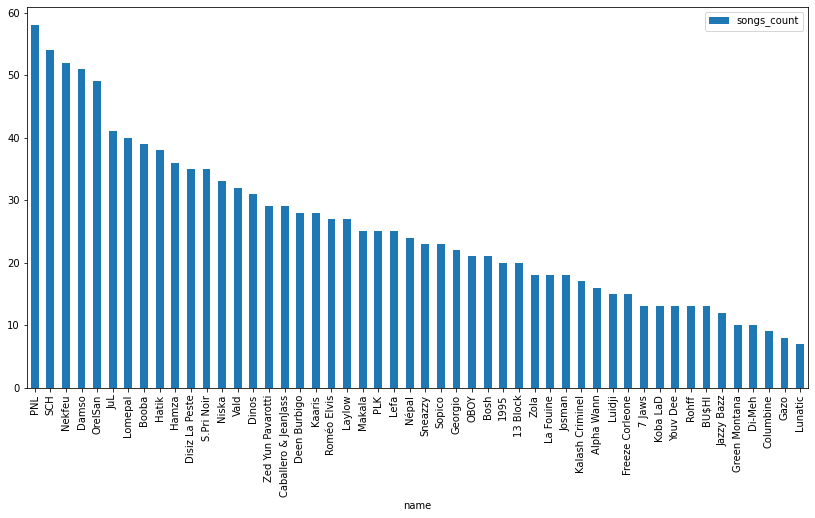

In [45]:
artists.sort_values("songs_count", ascending=False).head(50).plot(kind="bar", x="name", y="songs_count", figsize=(14, 7))

## Calcul du pourcentage de répétition

In [46]:
def select_words(song: dict):
    songs_count = len(song)

    song_df = pd.DataFrame(song)
    words = song_df["lyrics"].map(lambda x: x.split(" ")).explode().to_list()

    return words

def select_unique_words(words: list):
    return pd.Series(words).drop_duplicates().to_list()

artists["words"] = artists_songs["songs"].map(select_words)
artists["words_count"] = artists["words"].map(lambda x: len(x))

artists["unique_words"] = artists["words"].map(select_unique_words)
artists["unique_words_count"] = artists["unique_words"].map(lambda x: len(x))

artists["reptition_count"] = artists["words_count"] - artists["unique_words_count"]

artists["repetition_percentage"] = artists["reptition_count"] / artists["words_count"] * 100

artists.sort_values(by="repetition_percentage", inplace=True)

artists

,name,id,url,image,songs,songs_count,words,words_count,unique_words,unique_words_count,reptition_count,repetition_percentage
8,Columbine,315143,https://genius.com/artists/Columbine,https://images.genius.com/1fe7daf087e6825cef60...,"[{'artist_name': 'Columbine', 'artist_id': 315...",9,"[l'enfant, sauvage, l'enfant, terrible, a, les...",3177,"[l'enfant, sauvage, terrible, a, les, bras, éc...",1125,2052,64.589235
43,Rohff,1908,https://genius.com/artists/Rohff,https://images.genius.com/e7d85b983e15fcf9b3af...,"[{'artist_name': 'Rohff', 'artist_id': 1908, '...",13,"[comme, le, décès, d, un, proche, j, viens, t,...",9606,"[comme, le, décès, d, un, proche, j, viens, t,...",3247,6359,66.198209
33,Lunatic,1945,https://genius.com/artists/Lunatic,https://images.genius.com/988880b2a371c8ede99a...,"[{'artist_name': 'Lunatic', 'artist_id': 1945,...",7,"[on, n'est, pas, du, même, groupe, sanguin, pa...",4730,"[on, n'est, pas, du, même, groupe, sanguin, cr...",1579,3151,66.617336
20,Jazzy Bazz,13956,https://genius.com/artists/Jazzy-bazz,https://images.genius.com/1404d03558b5bab5530a...,"[{'artist_name': 'Jazzy Bazz', 'artist_id': 13...",12,"[le, soleil, commence, à, décliner, j'aimerais...",4354,"[le, soleil, commence, à, décliner, j'aimerais...",1423,2931,67.317409
49,Suprême NTM,24568,https://genius.com/artists/Supreme-ntm,https://images.genius.com/949ffbea5ebe16dd1762...,"[{'artist_name': 'Suprême NTM', 'artist_id': 2...",7,"[à, mon, contact, le, hip-hop, reste, compact,...",4055,"[à, mon, contact, le, hip-hop, reste, compact,...",1250,2805,69.173859
50,Swing,8444,https://genius.com/artists/Swing,https://images.genius.com/b7403990aa1d693cfd2d...,"[{'artist_name': 'Swing', 'artist_id': 8444, '...",5,"[perdu, dans, la, brousse, au-d'ssus, d, moi, ...",1814,"[perdu, dans, la, brousse, au-d'ssus, d, moi, ...",551,1263,69.625138
25,Kery James,1273,https://genius.com/artists/Kery-james,https://images.genius.com/74cf66f613495ab9c902...,"[{'artist_name': 'Kery James', 'artist_id': 12...",6,"[ecoute, de, la, fin, de, si, c, était, à, ref...",4481,"[ecoute, de, la, fin, si, c, était, à, refaire...",1351,3130,69.850480
1,1995,12091,https://genius.com/artists/1995,https://images.genius.com/0d0c589a33ca5244d534...,"[{'artist_name': '1995', 'artist_id': 12091, '...",20,"[j, ai, vu, les, pyramides, qui, ondulaient, l...",11708,"[j, ai, vu, les, pyramides, qui, ondulaient, l...",3509,8199,70.029040
32,Luidji,14723,https://genius.com/artists/Luidji,https://images.genius.com/a8a0e2ed1cb27d7742f2...,"[{'artist_name': 'Luidji', 'artist_id': 14723,...",15,"[-, quand, j'ai, vraiment, besoin, du, secours...",4280,"[-, quand, j'ai, vraiment, besoin, du, secours...",1258,3022,70.607477
35,Moji x Sboy,1817377,https://genius.com/artists/Moji-x-sboy,https://images.genius.com/6d8e5c686e7c3224514c...,"[{'artist_name': 'Moji x Sboy', 'artist_id': 1...",3,"[eh, bébé, dis, moi, c, que, t'as, dans, la, t...",1507,"[eh, bébé, dis, moi, c, que, t'as, dans, la, t...",440,1067,70.802920


## Classement des artistes se répétant le moins au plus

<AxesSubplot:xlabel='name'>

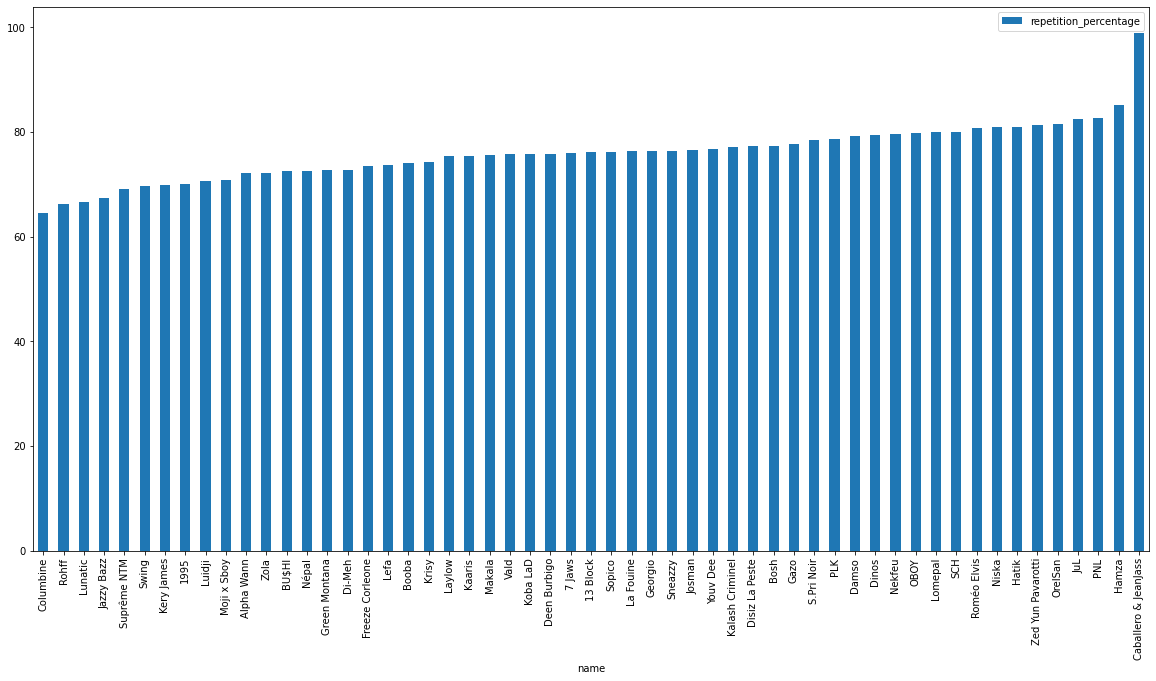

In [47]:
artists.plot(kind="bar", x="name", y="repetition_percentage", figsize=(20, 10))